In [ ]:
!pip install pm4py

In [3]:
import os
import pm4py
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Analysis of output of LIBRA

In [ ]:
path = '/content/drive/MyDrive/Masterthesis/output/'
files = [f for f in os.listdir(path)]
f_as_dict = {}
for f in files:
    f_as_df = pm4py.read_xes(path + f)
    # parameters = f_as_df[6:-3]
    f_as_dict[f] = f_as_df['case:concept:name'].nunique()

In [ ]:
info_as_df = pd.DataFrame([f_as_dict.keys(), f_as_dict.values()])
info_as_df = info_as_df.transpose()
info_as_df.columns = ['file', 'cases']
info_as_df['alpha'] = info_as_df['file'].apply(lambda s: int(s.split('_')[1].split('alpha')[1]))
info_as_df['b'] = info_as_df['file'].apply(lambda s: int(s.split('_')[2].split('b')[1]))
info_as_df['gamma'] = info_as_df['file'].apply(lambda s: float(s.split('_')[3].split('gamma')[1]))
info_as_df['epsilon'] = info_as_df['file'].apply(lambda s: int(s.split('_')[4].split('epsilon')[1]))
info_as_df['delta'] = info_as_df['file'].apply(lambda s: float(s.split('_')[5].split('delta')[1][:-4]))
info_as_df

In [7]:
# Figure out which parameters are working
alphas = info_as_df['alpha'].unique()
bs = info_as_df['b'].unique()
gammas = info_as_df['gamma'].unique()
epsilons = info_as_df['epsilon'].unique()
deltas = info_as_df['delta'].unique()
print("alpha: {}".format(alphas))
print("b: {}".format(bs))
print("gamma: {}".format(gammas))
print("epsilon: {}".format(epsilons))
print("delta: {}".format(deltas))

cols = ['alpha', 'b', 'gamma', 'epsilon', 'delta']
# save parameter combinations
parameter_df = info_as_df[cols]
parameter_df.to_csv('paras.csv')

alpha: [10 20]
b: [1 2]
gamma: [0.03 0.05 0.07 0.09]
epsilon: [10 20 30 40 50]
delta: [0.001 0.002 0.003 0.004]


In [8]:
file_with_most_cases = info_as_df[info_as_df['cases'] == info_as_df['cases'].max()]['file'].values[0]
file_with_most_cases

'Sepsis_alpha10_b1_gamma0.049999999999999996_epsilon40_delta0.001.xes'

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

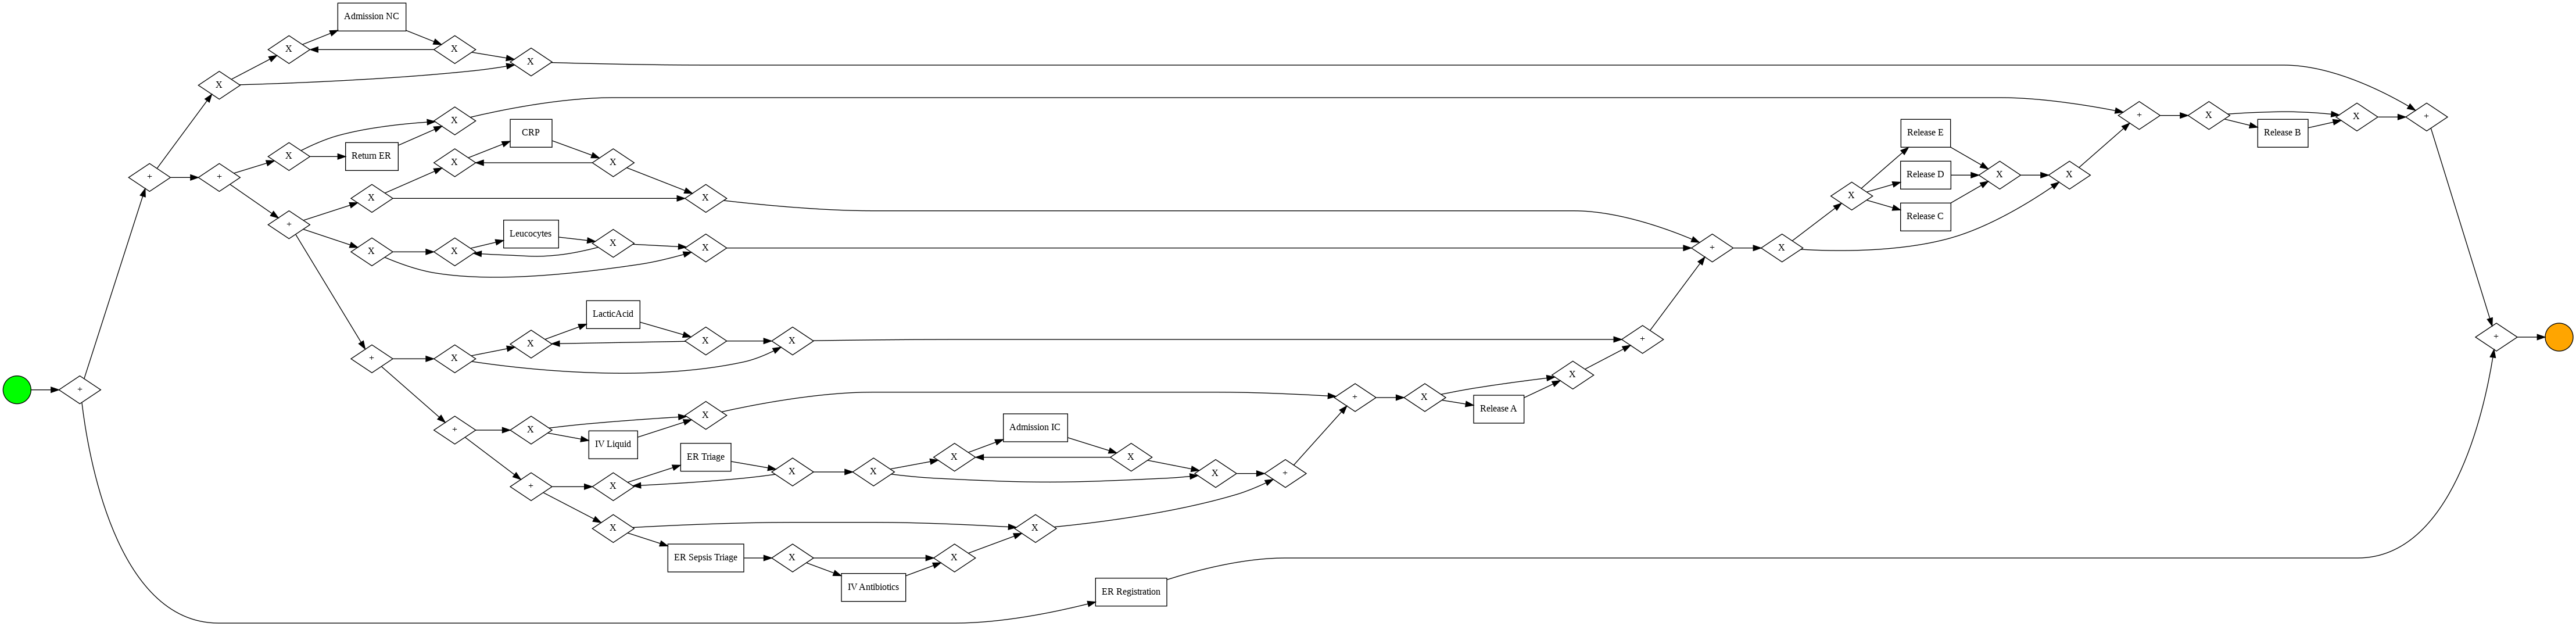

In [9]:
# Discover original event log
event_log = pm4py.read_xes('/content/drive/MyDrive/Masterthesis/data/Sepsis.xes')
event_log['time:timestamp'] = pd.to_datetime(event_log['time:timestamp'], utc=True)
process_tree = pm4py.discover_process_tree_inductive(log=event_log, activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

parsing log, completed traces ::   0%|          | 0/105 [00:00<?, ?it/s]

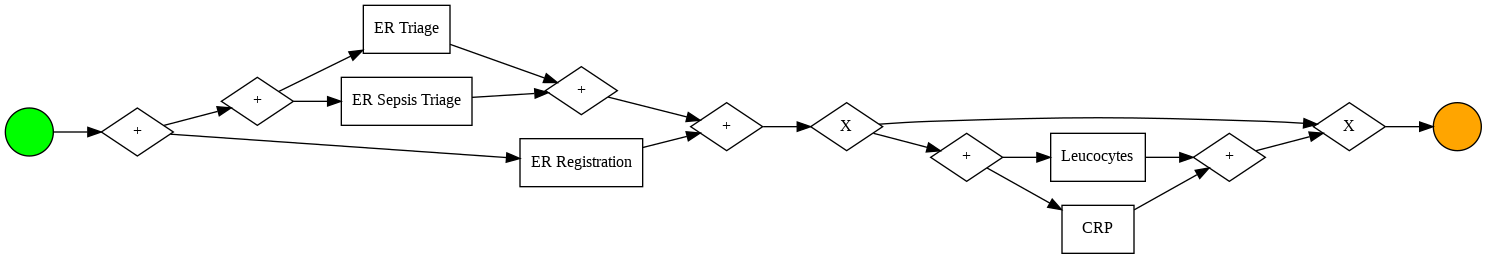

In [10]:
# Discover anonymized event log with most cases
event_log_anonymized = pm4py.read_xes(path + file_with_most_cases)
event_log_anonymized['time:timestamp'] = pd.to_datetime(event_log_anonymized['time:timestamp'], utc=True)
process_tree = pm4py.discover_process_tree_inductive(log=event_log_anonymized, activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

Analysis of ANUM

parsing log, completed traces ::   0%|          | 0/1334 [00:00<?, ?it/s]

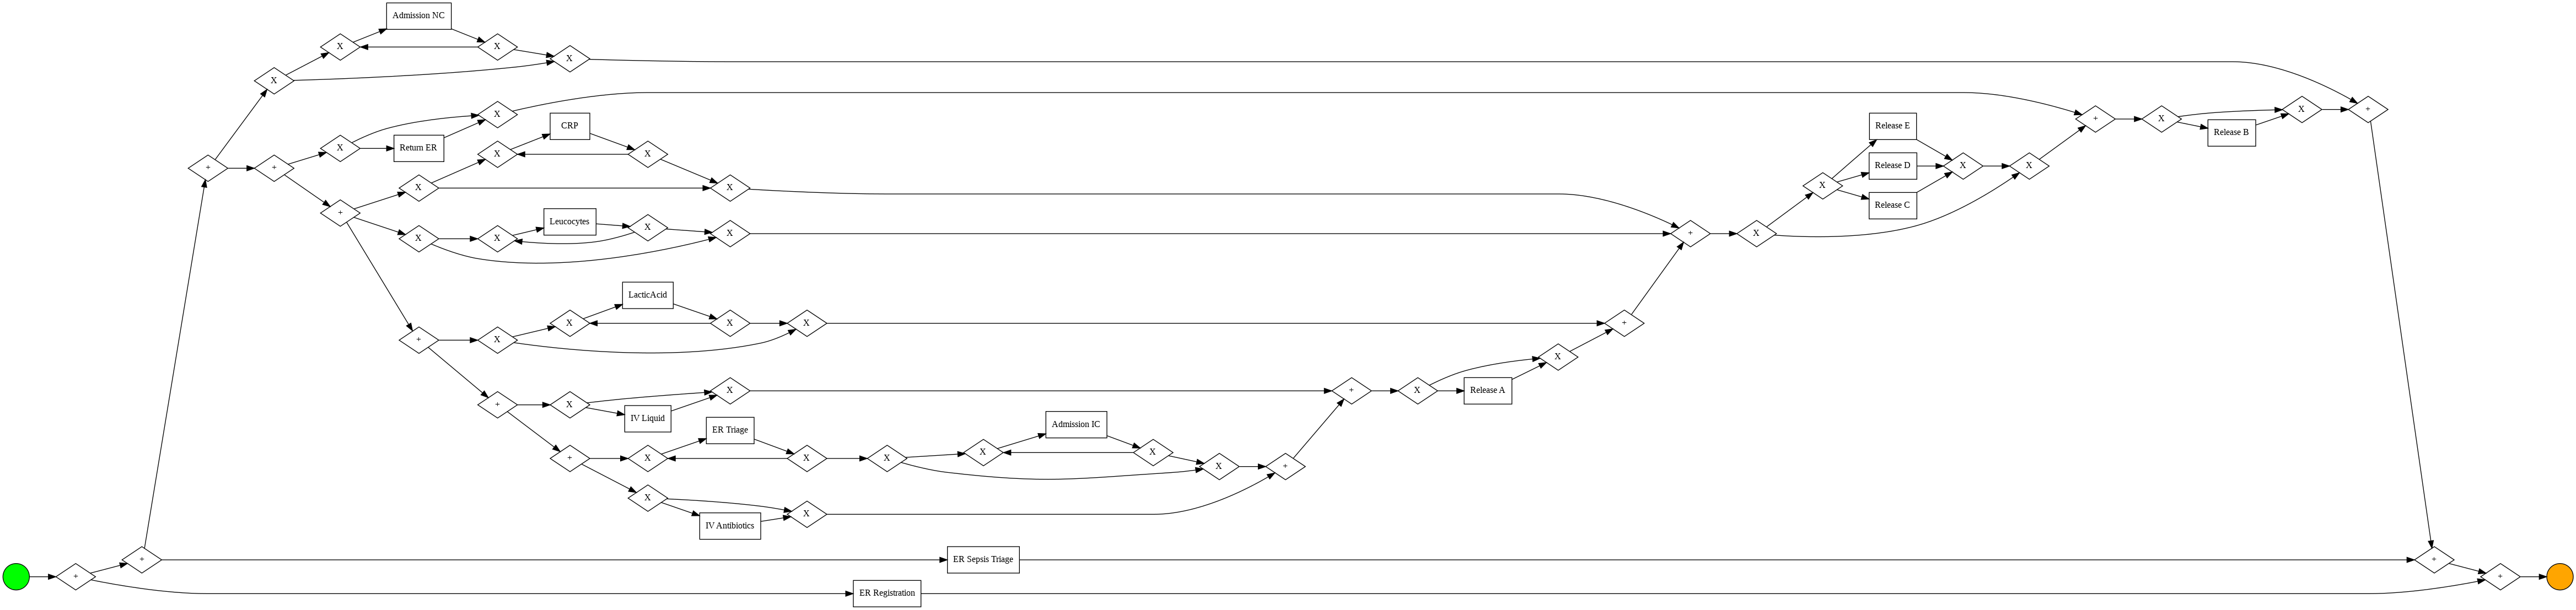

In [11]:
event_log_anum = pm4py.read_xes('/content/drive/MyDrive/Masterthesis/AMUN_e_anonymized_Sepsis_sampling_delta0.2.xes')
event_log_anum['time:timestamp'] = pd.to_datetime(event_log_anum['time:timestamp'], utc=True)
process_tree = pm4py.discover_process_tree_inductive(log=event_log_anum, activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)